# 📊 Customer Churn Analysis: Exploratory Data Analysis (EDA)

**Goal**: Visualize patterns and explore drivers of customer churn in telecom data.

**Dataset**: Cleaned customer churn dataset with 7,043 records and 20 features.

**Process**:
- Data loading and initial inspection
- Distribution analysis of target variable (Churn)
- Feature correlation exploration
- Churn patterns by contract type, payment method, tenure, and demographics
- Revenue impact assessment

**Outcome**: Identify key features associated with churn to inform predictive modeling.


## Setup: Imports and Visualization Configuration

We import standard data science libraries and configure visualization styling for consistency across all plots.


In [1]:
# Core Data & Visualization Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# System path for custom modules
import sys
import os
sys.path.append('../src')

# Custom visualization class for reusable plotting
from visualization import ChurnVisualizer

# Visualization styling
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10

# Set random seed for reproducibility
np.random.seed(42)

print("="*70)
print("CUSTOMER CHURN ANALYSIS - EXPLORATORY DATA ANALYSIS")
print("="*70)


CUSTOMER CHURN ANALYSIS - EXPLORATORY DATA ANALYSIS


## Load Cleaned Data

We load the preprocessed customer churn dataset and inspect its structure.


In [2]:
# Load cleaned data
df_processed = pd.read_csv('../data/processed/customer_churn_cleaned.csv')
df = df_processed.copy()

print(f"\n✓ Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns\n")

# Display first few rows
print("Sample Data:")
display(df.head())

# Display column info
print("\nColumn Info:")
df.info()


✓ Dataset loaded: 7,043 rows, 21 columns

Sample Data:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3167-SNQPL,Male,1,Yes,Yes,38.0,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,1398.60,0
1,6905-NIQIN,Male,0,No,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,70.40,50.65,1
2,3898-GUYTS,Male,1,No,No,45.0,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,97.05,4385.05,0
3,8499-BRXTD,Male,0,No,No,18.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,401.85,0
4,4629-NRXKX,Female,0,Yes,Yes,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.40,1398.60,1



Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

## Initialize Visualization Helper

We create a `ChurnVisualizer` instance for consistent, reusable plotting and ensure the output directory exists for saving charts.


In [3]:
# Create visualizer instance
visualizer = ChurnVisualizer()

# Set output directory for saving plots
output_dir = '../visualizations/charts'
os.makedirs(output_dir, exist_ok=True)

print(f"✓ Output directory: {output_dir}")


✓ Output directory: ../visualizations/charts


### 1. Churn Distribution

Visualizing the proportion of churned vs. retained customers helps us understand class balance and assess business urgency.


1. Generating Churn Distribution...


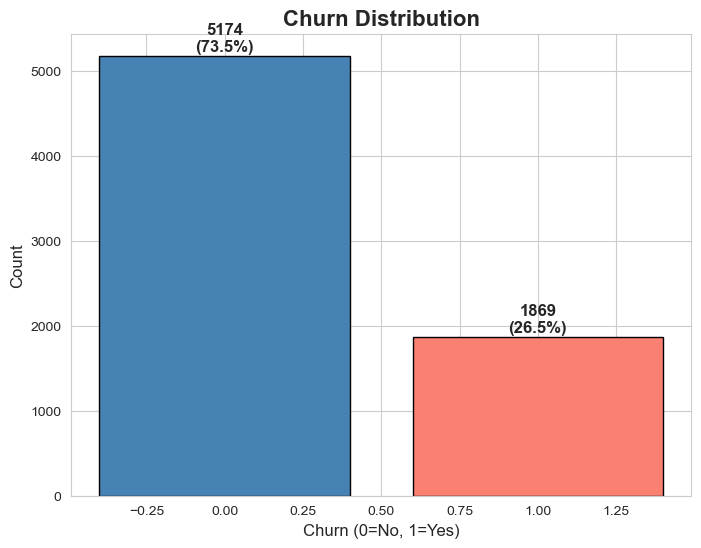

In [4]:
print("1. Generating Churn Distribution...")
visualizer.plot_churn_distribution(
    df['Churn'], 
    save_path=os.path.join(output_dir, 'churn_distribution.png')
)

### 2. Correlation Heatmap

Correlation analysis reveals relationships between numerical features and potential multicollinearity, guiding feature selection.



2. Generating Correlation Heatmap...


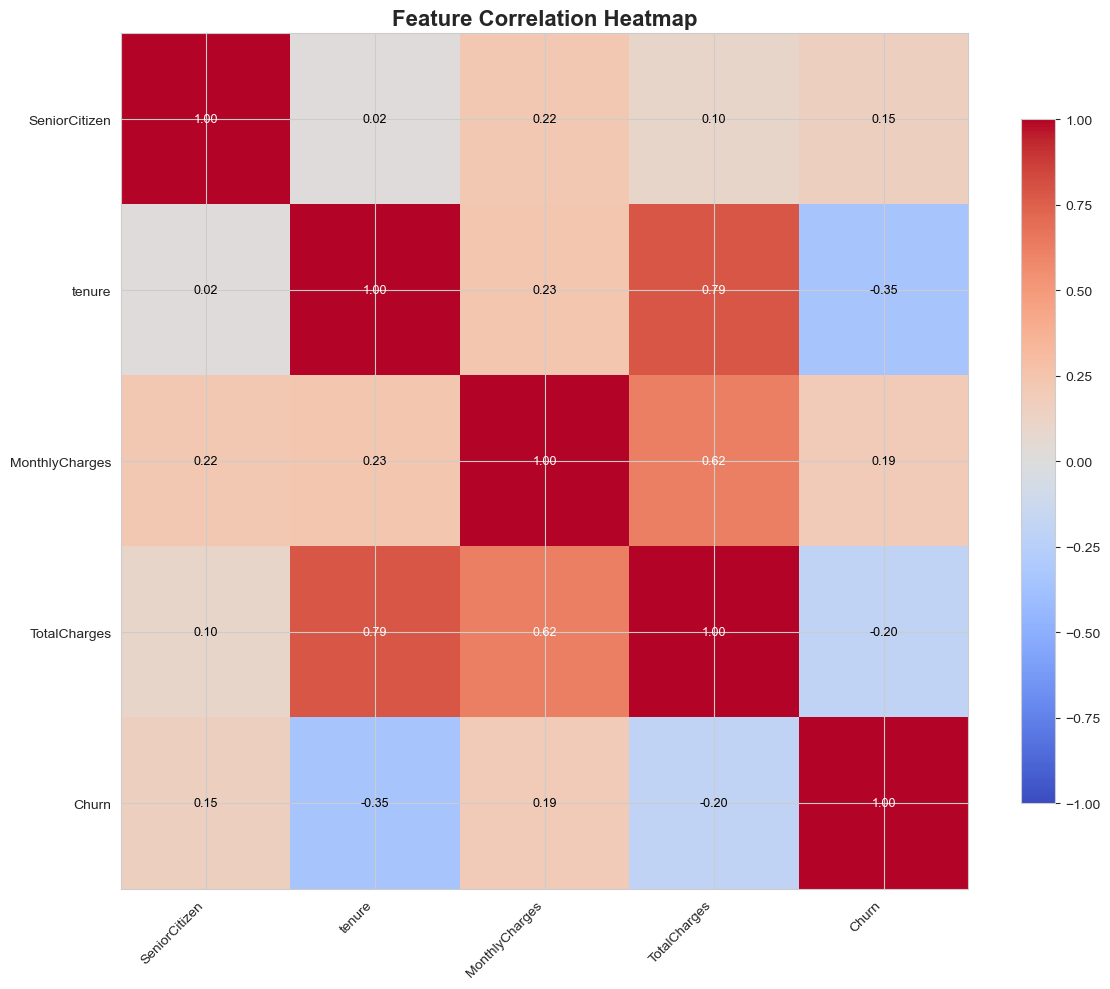

In [5]:
print("\n2. Generating Correlation Heatmap...")
visualizer.plot_correlation_heatmap(
    df,
    save_path=os.path.join(output_dir, 'correlation_heatmap.png')
)

### 3. Churn Rate by Contract Type

Contract type is a key business lever. This analysis shows how contract length impacts customer retention.



3. Generating Churn Rate by Contract Type...


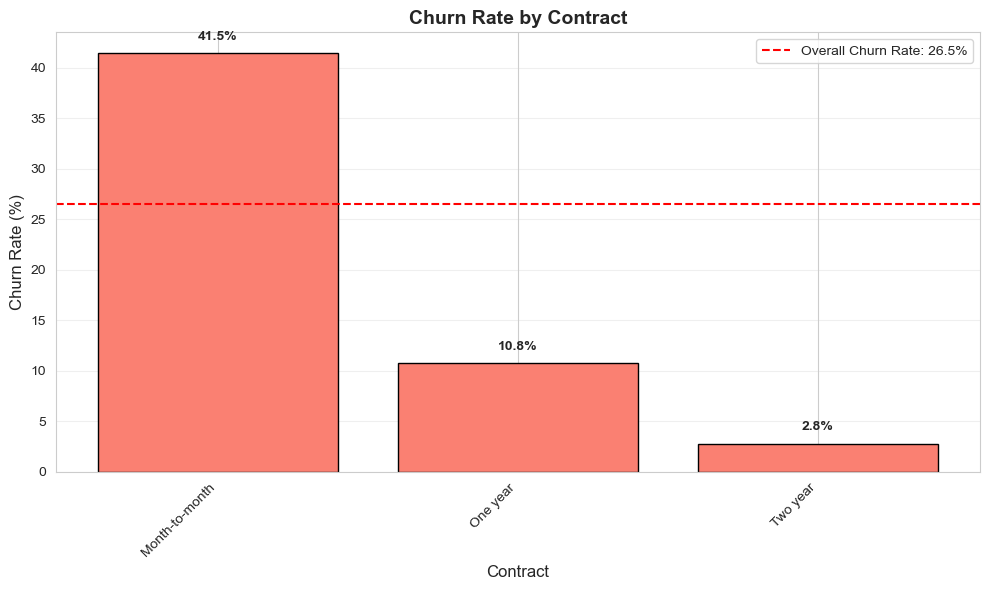

In [6]:
# Re-import your module
from visualization import ChurnVisualizer  # or however you import it

# Create a NEW instance
visualizer = ChurnVisualizer()

if 'Contract' in df.columns:
    print("\n3. Generating Churn Rate by Contract Type...")
    visualizer.plot_churn_rate_by_category(
        df, 
        category_col='Contract',
        target='Churn',
        save_path=os.path.join(output_dir, 'churn_by_contract.png')
    )

###  4. Churn Rate by Internet Service


4. Generating Churn Rate by Internet Service...


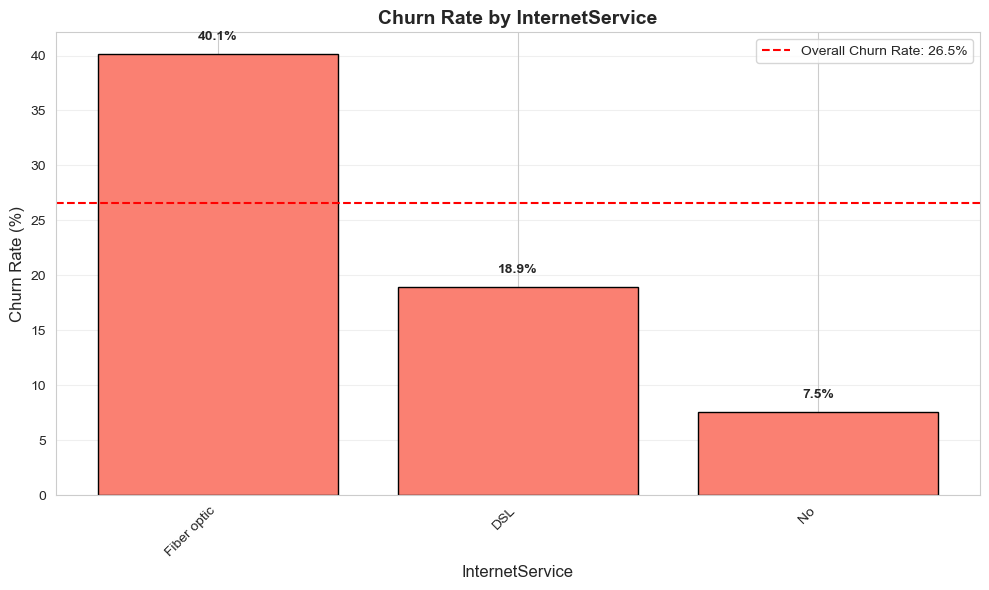

In [7]:
if 'InternetService' in df.columns:
    print("\n4. Generating Churn Rate by Internet Service...")
    visualizer.plot_churn_rate_by_category(
        df,
        category_col='InternetService',
        target='Churn',
        save_path=os.path.join(output_dir, 'churn_by_internet_service.png')
    )

### 5. Churn Rate by Payment Method


5. Generating Churn Rate by Payment Method...


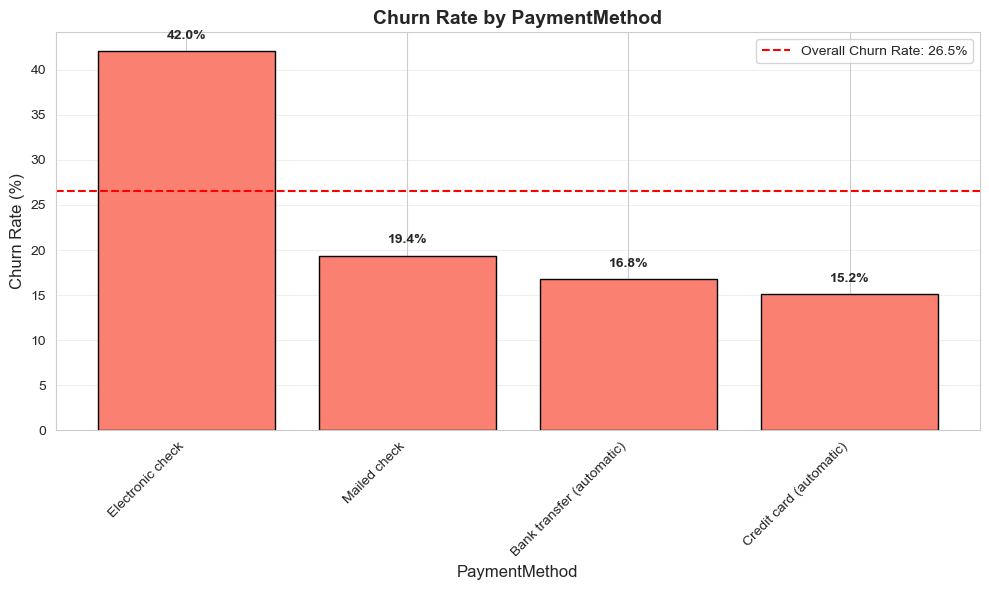

In [8]:
if 'PaymentMethod' in df.columns:
    print("\n5. Generating Churn Rate by Payment Method...")
    visualizer.plot_churn_rate_by_category(
        df,
        category_col='PaymentMethod',
        target='Churn',
        save_path=os.path.join(output_dir, 'churn_by_payment_method.png')
    )

### 6. Feature Distributions (Numerical)


6. Generating Numerical Feature Distributions...


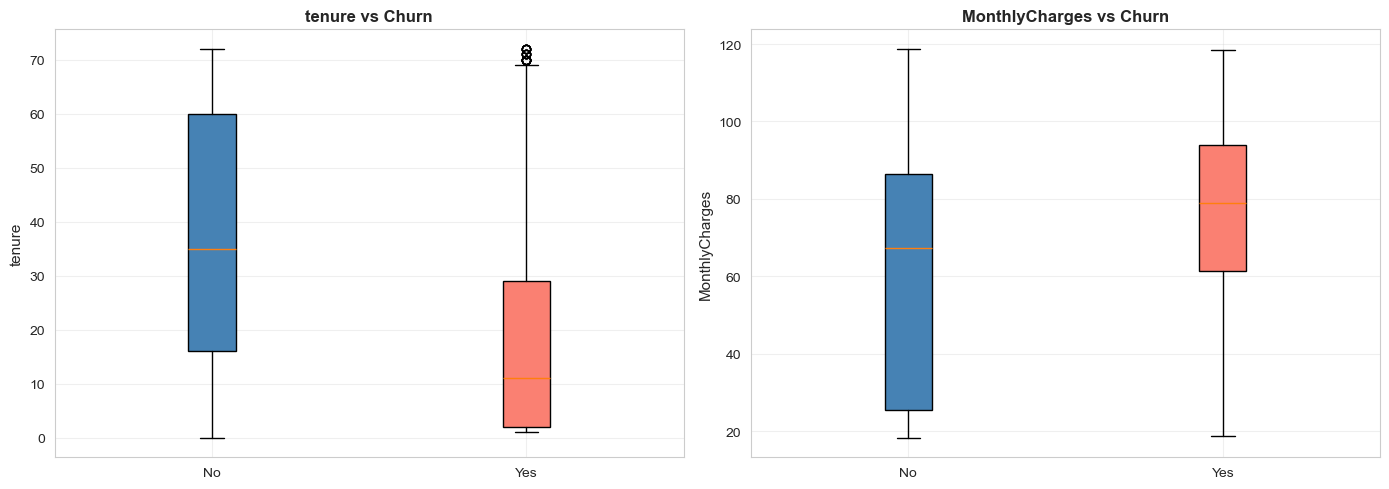

In [9]:
numerical_features = ['tenure', 'MonthlyCharges']
available_numerical = [col for col in numerical_features if col in df.columns]

if available_numerical:
    print("\n6. Generating Numerical Feature Distributions...")
    visualizer.plot_feature_distributions(
        df,
        features=available_numerical,
        target='Churn',
        save_path=os.path.join(output_dir, 'numerical_features_distribution.png')
    )

### 7. Feature Distributions (Categorical)


7. Generating Categorical Feature Distributions...


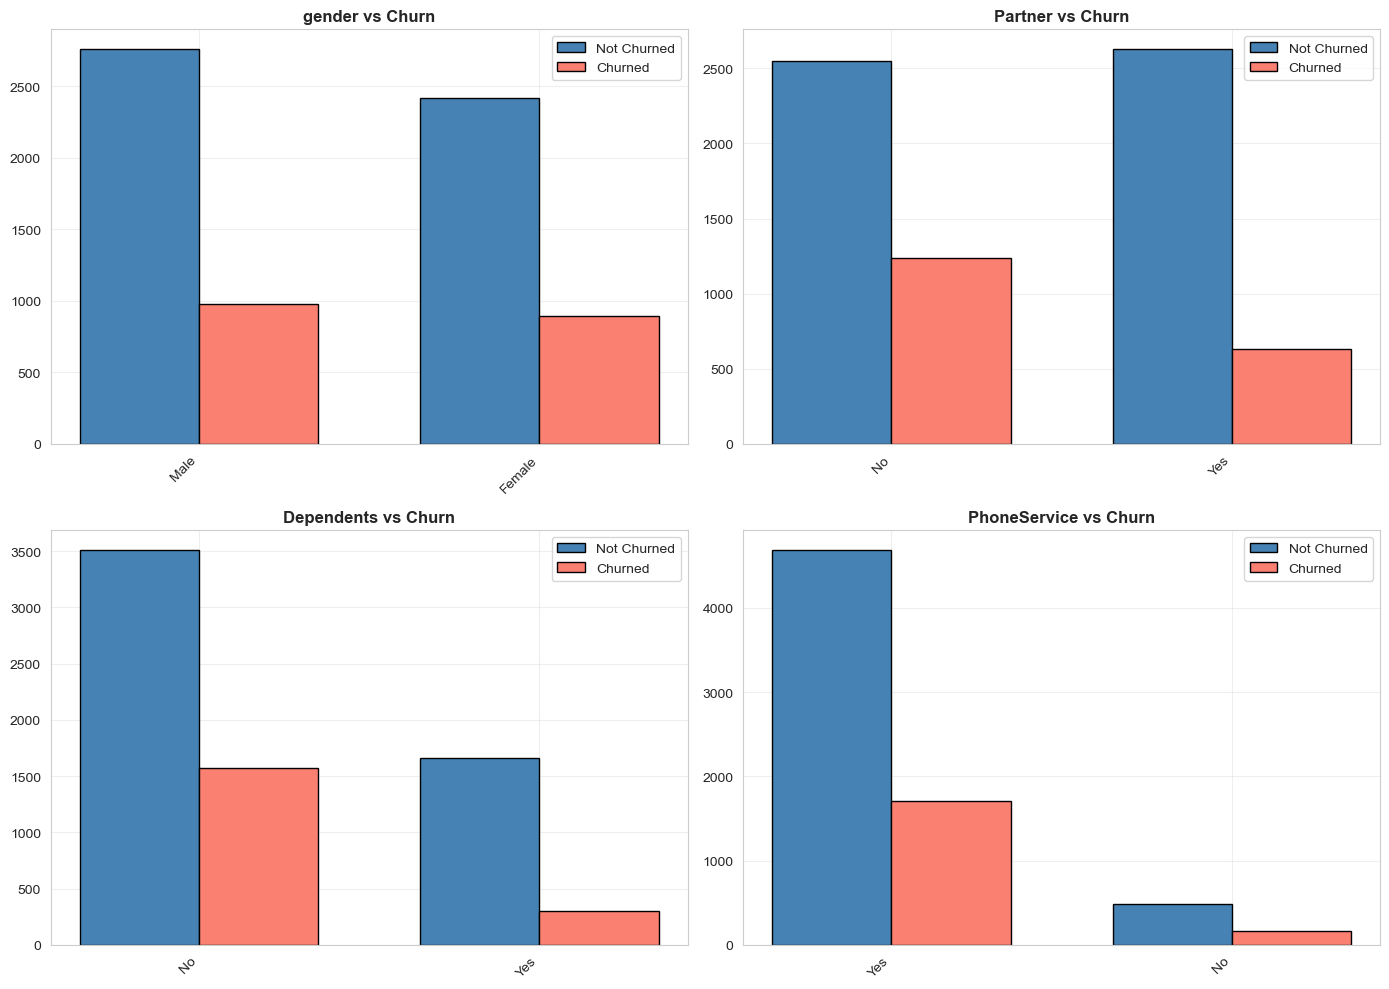

In [10]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService']
available_categorical = [col for col in categorical_features if col in df.columns]

if available_categorical:
    print("\n7. Generating Categorical Feature Distributions...")
    visualizer.plot_feature_distributions(
        df,
        features=available_categorical[:4],  # Limit to 4 for better layout
        target='Churn',
        save_path=os.path.join(output_dir, 'categorical_features_distribution.png')
    )

### 8. Tenure Segments Analysis


8. Generating Tenure Segments Analysis...


D:\Labmentix\customer-churn-analysis\notebooks\../src\visualization.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df_local.groupby('__tenure_segment')[target].mean().reindex(labels)


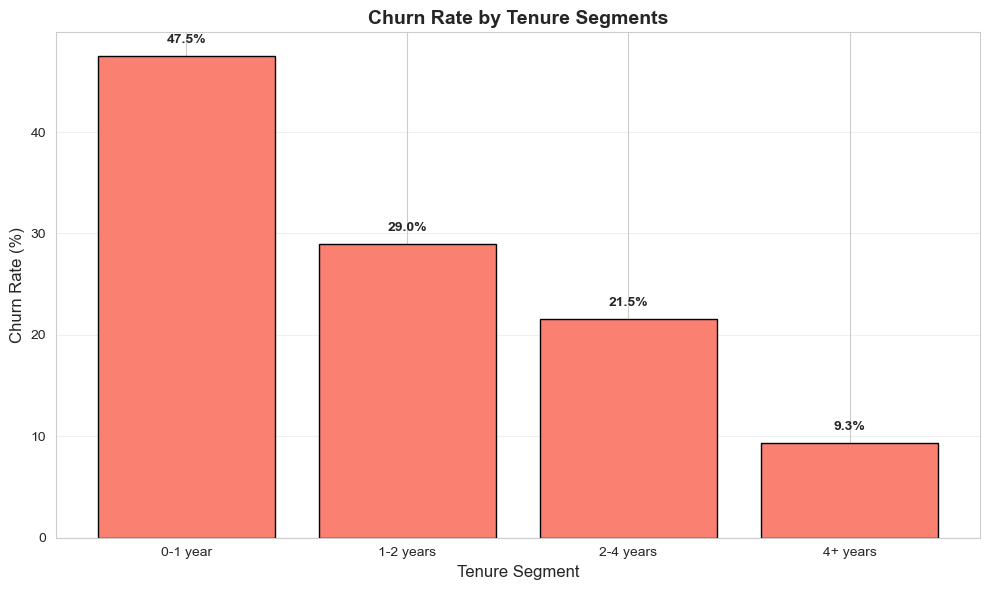

In [11]:
if 'tenure' in df.columns:
    print("\n8. Generating Tenure Segments Analysis...")
    visualizer.plot_tenure_segments_churn(
        df.copy(),  # Pass a copy to avoid modifying original
        tenure_col='tenure',
        target='Churn',
        save_path=os.path.join(output_dir, 'churn_by_tenure_segments.png')
    )

### 9. Revenue Impact Analysis


9. Generating Revenue Impact Analysis...


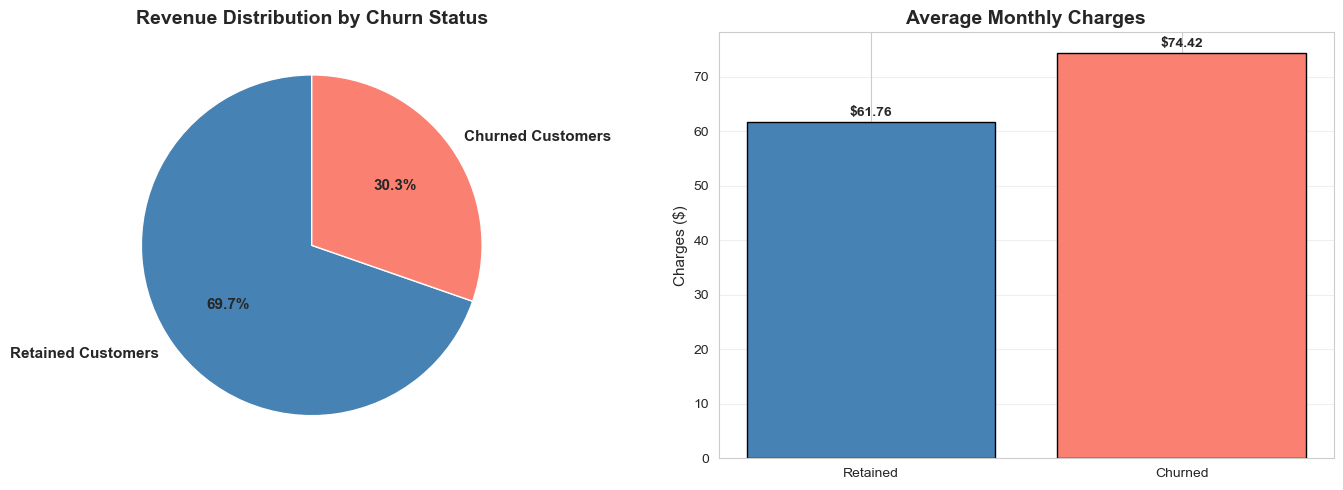

In [12]:
if 'MonthlyCharges' in df.columns:
    print("\n9. Generating Revenue Impact Analysis...")
    visualizer.plot_revenue_impact(
        df,
        monthly_charges_col='MonthlyCharges',
        target='Churn',
        save_path=os.path.join(output_dir, 'revenue_impact_analysis.png')
    )

## 📈 Key Insights from EDA

The following summary highlights critical findings from our exploratory analysis.


In [13]:
# Print summary insights
print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)

print(f"\n✓ Total Customers: {len(df):,}")
print(f"✓ Churned Customers: {df['Churn'].sum():,}")
print(f"✓ Churn Rate: {df['Churn'].mean():.2%}")

if 'tenure' in df.columns:
    print(f"\n✓ Average Tenure: {df['tenure'].mean():.1f} months")
    print(f"✓ Average Tenure (Churned): {df[df['Churn']==1]['tenure'].mean():.1f} months")
    print(f"✓ Average Tenure (Retained): {df[df['Churn']==0]['tenure'].mean():.1f} months")

if 'MonthlyCharges' in df.columns:
    print(f"\n✓ Average Monthly Charge: ${df['MonthlyCharges'].mean():.2f}")
    print(f"✓ Average Monthly Charge (Churned): ${df[df['Churn']==1]['MonthlyCharges'].mean():.2f}")
    print(f"✓ Average Monthly Charge (Retained): ${df[df['Churn']==0]['MonthlyCharges'].mean():.2f}")
    
    total_revenue = df['MonthlyCharges'].sum()
    churned_revenue = df[df['Churn']==1]['MonthlyCharges'].sum()
    print(f"\n✓ Total Monthly Revenue: ${total_revenue:,.2f}")
    print(f"✓ Revenue at Risk (Churned): ${churned_revenue:,.2f} ({churned_revenue/total_revenue*100:.1f}%)")

print("\n" + "="*70)
print("EXPLORATORY ANALYSIS COMPLETE!")
print("="*70)
print(f"\n✓ All visualizations saved to: {output_dir}")



KEY INSIGHTS

✓ Total Customers: 7,043
✓ Churned Customers: 1,869
✓ Churn Rate: 26.54%

✓ Average Tenure: 32.2 months
✓ Average Tenure (Churned): 18.4 months
✓ Average Tenure (Retained): 37.2 months

✓ Average Monthly Charge: $65.12
✓ Average Monthly Charge (Churned): $74.42
✓ Average Monthly Charge (Retained): $61.76

✓ Total Monthly Revenue: $458,652.45
✓ Revenue at Risk (Churned): $139,094.45 (30.3%)

EXPLORATORY ANALYSIS COMPLETE!

✓ All visualizations saved to: ../visualizations/charts


## 🎯 Conclusions and Next Steps

### Key Findings:
- **Churn rate is 26.54%**, indicating a significant retention challenge.
- **Month-to-month contracts** and **electronic check payments** correlate with higher churn rates.
- Customers with **shorter tenure** are significantly more likely to churn.
- **Revenue at risk** from churned customers is substantial (~30%).

### Next Steps:
1. **Feature Engineering**: Create interaction features based on high-impact variables (contract type, tenure, charges).
2. **Modeling**: Build predictive models (Logistic Regression, Random Forest, XGBoost) to forecast churn.
3. **Business Strategy**: Design retention campaigns targeting high-risk segments (short-tenure, month-to-month customers).

